## Constrained multiobjective optimization using MOBO


In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian.algorithms import mobo
from botorch.utils.multi_objective.pareto import is_non_dominated


# test function
from xopt.evaluators import test_TNK
?mobo


Signature: mobo(vocs, evaluate_f, output_path=None, **kwargs)
Docstring: <no docstring>
File:      c:\users\ryan roussel\documents\github\xopt\xopt\bayesian\algorithms.py
Type:      function


In [2]:
# Get VOCS
VOCS = test_TNK.VOCS

# add reference point
ref = [1.4, 1.4]

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

gen_options = {'batch_size':4,                      ## Specify batched mobo
              }

# Run the optimization
results = mobo(VOCS, EVALUATE,
               ref = ref,
               generator_options = gen_options,
               n_initial_samples=5,                   ## Specify number of initial random samples
               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
               use_gpu=False,                         ## Use GPU
               n_steps=5,                             ## number of optimization step
               # restart_data_file = 'results.json',  ## restart optimization file
               # custom_model = myCustomModel,        ## Specify custom model creation function (see examples/bayes_exp/serial_nans.ipynb)
               verbose=True)

print(results.keys())

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
Candidate(s): tensor([[1.0662, 0.0450],
        [0.4259, 0.4143],
        [1.3632, 0.6494],
        [0.7435, 1.1965]], dtype=torch.float64)


C:\ProgramData\Miniconda3\envs\xopt\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


Candidate(s): tensor([[1.0829, 0.2143],
        [0.5213, 0.9854],
        [0.0000, 0.0000],
        [0.0000, 0.5924]], dtype=torch.float64)
Candidate(s): tensor([[1.0460, 0.0809],
        [0.2464, 1.0575],
        [0.0119, 1.0183],
        [0.3752, 1.0615]], dtype=torch.float64)
Candidate(s): tensor([[0.0812, 1.0513],
        [0.7104, 0.7530],
        [0.8930, 0.4757],
        [1.0298, 0.0460]], dtype=torch.float64)
Candidate(s): tensor([[0.6945, 0.7906],
        [0.0457, 1.0317],
        [0.4544, 0.9361],
        [0.9773, 0.2608]], dtype=torch.float64)
dict_keys(['variables', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model'])


dict_keys(['variables', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model'])


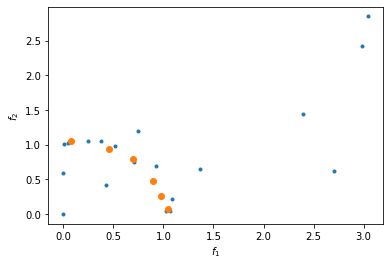

In [3]:
fig, ax = plt.subplots()
print(results.keys())
train_y = results['objectives']
valid_y = train_y[results['feasibility'].flatten()]
ax.plot(train_y[:, 0], train_y[:, 1], '.')
ax.set_ylabel('$f_2$')
ax.set_xlabel('$f_1$')

# highlight Pareto front, ONLY using valid observations (note botorch assumes maximization when determing dominant points)
non_dom = is_non_dominated(-valid_y)
ax.plot(valid_y[:,0][non_dom],valid_y[:,1][non_dom],'C1o')

plt.show()